**Table of contents**<a id='toc0_'></a>    
- [Sales Analysis](#toc1_)    
      - [Import necessary libraries](#toc1_1_1_1_)    
    - [Merge 12 month of sales data into a single file](#toc1_1_2_)    
    - [Read the merged file](#toc1_1_3_)    
    - [Clean up the data](#toc1_1_4_)    
      - [Drop NaN value](#toc1_1_4_1_)    
      - [Remove 'Or' from Order Date](#toc1_1_4_2_)    
      - [Convert data into correct type](#toc1_1_4_3_)    
    - [Augment data with additional information](#toc1_1_5_)    
      - [Adding month Columns](#toc1_1_5_1_)    
      - [Add Sales Column](#toc1_1_5_2_)    
      - [Add Address, Cities, And Zip Code Column](#toc1_1_5_3_)    
      - [Add Order Time Column](#toc1_1_5_4_)    
    - [Question 1: What was the best month for sales? How Much was earned that month?](#toc1_1_6_)    
    - [Question 2: What City had the highest number of sales](#toc1_1_7_)    
    - [Question 3: What time should we display ads for maximize likelihood of customer's buying products?](#toc1_1_8_)    
  - [Question 4: What products are most often sold together?](#toc1_2_)    
  - [Question 5: What products are sold the most? and why is it?](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Sales Analysis](#toc0_)

#### <a id='toc1_1_1_1_'></a>[Import necessary libraries](#toc0_)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### <a id='toc1_1_2_'></a>[Merge 12 month of sales data into a single file](#toc0_)

In [2]:
import os

path  = 'Sales_Data'
df = pd.DataFrame()
for file_name in os.listdir(path):
    file_path = os.path.join(path, file_name)
    data = pd.read_csv(file_path)
    df = pd.concat([df, data])

df.to_csv('Output/all_data.csv', index=False)

### <a id='toc1_1_3_'></a>[Read the merged file](#toc0_)

In [3]:
df = pd.read_csv('Output/all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


### <a id='toc1_1_4_'></a>[Clean up the data](#toc0_)

#### <a id='toc1_1_4_1_'></a>[Drop NaN value](#toc0_)

In [4]:
# Check NaN data di setiap baris
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185515,NaN,NaN,NaN,NaN,NaN,NaN
185650,NaN,NaN,NaN,NaN,NaN,NaN
186512,NaN,NaN,NaN,NaN,NaN,NaN
186720,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping Null Data
## Drop if all in row is NaN

df = df.dropna(how='all'); df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### <a id='toc1_1_4_2_'></a>[Remove 'Or' from Order Date](#toc0_)

In [6]:
## Check what data include 'Or'
df.loc[df['Order Date'].str.contains('Or')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
182788,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185160,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Filter out the data have 'Or'
df = df.loc[~df['Order Date'].str.contains('Or')]

#### <a id='toc1_1_4_3_'></a>[Convert data into correct type](#toc0_)

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] =pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

### <a id='toc1_1_5_'></a>[Augment data with additional information](#toc0_)

#### <a id='toc1_1_5_1_'></a>[Adding month Columns](#toc0_)

In [9]:
df['Order Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5


#### <a id='toc1_1_5_2_'></a>[Add Sales Column](#toc0_)

In [10]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] ; df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98


#### <a id='toc1_1_5_3_'></a>[Add Address, Cities, And Zip Code Column](#toc0_)

In [11]:
df[['Address','Cities','City_Code_Zip']] = df['Purchase Address'].str.split(',', expand=True)
df['City_Code'] = df['City_Code_Zip'].apply(lambda x: x.split(' ')[1])
df['ZIP_Code'] = df['City_Code_Zip'].apply(lambda x: x.split(' ')[2])

df.drop(['City_Code_Zip', 'Purchase Address'],axis = 1, inplace=True)

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Sales,Address,Cities,City_Code,ZIP_Code
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,5,11.99,669 2nd St,New York City,NY,10001
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,5,3.84,844 Walnut St,Dallas,TX,75001
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,5,149.99,164 Madison St,New York City,NY,10001
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,5,11.99,622 Meadow St,Dallas,TX,75001
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,5,5.98,17 Church St,Seattle,WA,98101


#### <a id='toc1_1_5_4_'></a>[Add Order Time Column](#toc0_)

In [13]:
df['Order Time'] = df['Order Date'].dt.time
df['Order Hour'] = df['Order Date'].dt.hour

### <a id='toc1_1_6_'></a>[Question 1: What was the best month for sales? How Much was earned that month?](#toc0_)

In [14]:
results = df.groupby(by='Order Month').sum()

/tmp/ipykernel_213416/1638592665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby(by='Order Month').sum()


In [15]:
results

,Quantity Ordered,Price Each,Sales,Order Hour
Order Month,,,,
1,10903,1811768.38,1822256.73,139485
2,13449,2188884.72,2202022.42,172669
3,17005,2791207.83,2807100.38,218969
4,20558,3367671.02,3390670.24,262259
5,18667,3135125.13,3152606.75,238780
6,15253,2562025.61,2577802.26,195528
7,16072,2632539.56,2647775.76,206169
8,13448,2230345.42,2244467.88,172289
9,13109,2084992.09,2097560.13,168513


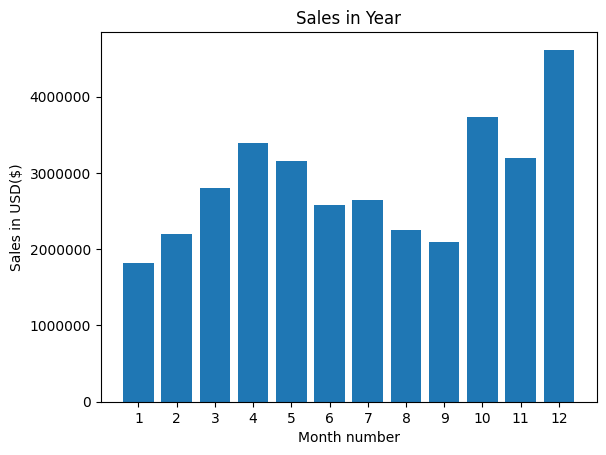

In [16]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.ticklabel_format(style='plain', axis='y') 
plt.xticks(months)
plt.title('Sales in Year')
plt.xlabel('Month number')
plt.ylabel('Sales in USD($)')
plt.show()

### <a id='toc1_1_7_'></a>[Question 2: What City had the highest number of sales](#toc0_)

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Sales,Address,Cities,City_Code,ZIP_Code,Order Time,Order Hour
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,5,11.99,669 2nd St,New York City,NY,10001,17:14:00,17
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,5,3.84,844 Walnut St,Dallas,TX,75001,14:43:00,14
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,5,149.99,164 Madison St,New York City,NY,10001,11:36:00,11
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,5,11.99,622 Meadow St,Dallas,TX,75001,20:40:00,20
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,5,5.98,17 Church St,Seattle,WA,98101,22:55:00,22


In [18]:
results =  df.groupby(by='Cities').sum()

/tmp/ipykernel_213416/1093051670.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results =  df.groupby(by='Cities').sum()


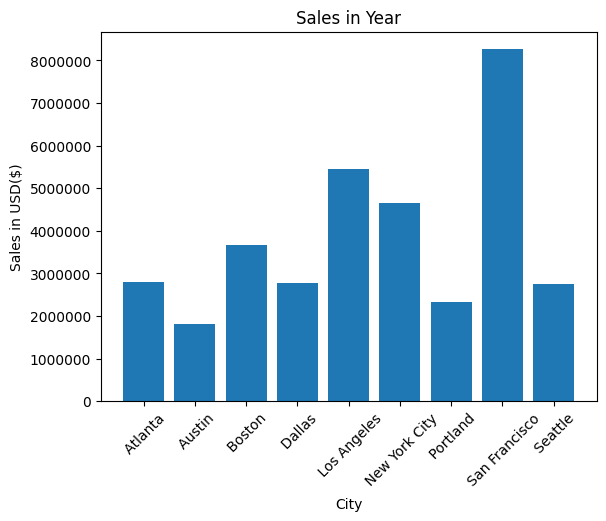

In [19]:
plt.bar(results.index, results['Sales'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales in Year')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Sales in USD($)')
plt.show()

### <a id='toc1_1_8_'></a>[Question 3: What time should we display ads for maximize likelihood of customer's buying products?](#toc0_)

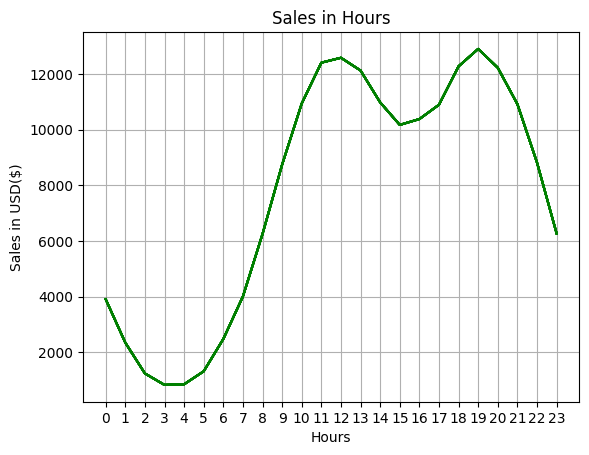

In [35]:
hours = [hour for hour, df in df.groupby('Order Hour')]

plt.plot(hours, df.groupby(['Order Hour']).count(), color='green')
plt.xticks(hours)
plt.title('Sales in Hours')
plt.xlabel('Hours')
plt.grid()
plt.ylabel('Sales in USD($)')
plt.show()

# Recommendations is around 11am or 7pm

## <a id='toc1_2_'></a>[Question 4: What products are most often sold together?](#toc0_)

In [61]:
## Check How much Order Id have duplicate or buy more that one products
df[df['Order ID'].duplicated(keep=False)].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Sales,Address,Cities,City_Code,ZIP_Code,Order Time,Order Hour,Grouped
15,194110,Google Phone,1,600.00,2019-05-31 18:07:00,5,600.00,498 14th St,Los Angeles,CA,90001,18:07:00,18,"Google Phone, Wired Headphones"
16,194110,Wired Headphones,1,11.99,2019-05-31 18:07:00,5,11.99,498 14th St,Los Angeles,CA,90001,18:07:00,18,"Google Phone, Wired Headphones"
77,194170,Google Phone,1,600.00,2019-05-30 12:30:00,5,600.00,711 Maple St,San Francisco,CA,94016,12:30:00,12,"Google Phone, USB-C Charging Cable"
78,194170,USB-C Charging Cable,2,11.95,2019-05-30 12:30:00,5,23.90,711 Maple St,San Francisco,CA,94016,12:30:00,12,"Google Phone, USB-C Charging Cable"
82,194174,iPhone,1,700.00,2019-05-04 23:08:00,5,700.00,37 North St,Seattle,WA,98101,23:08:00,23,"iPhone, Lightning Charging Cable, Wired Headph..."


In [62]:
# Make a Grouped Order Column
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ",".join(x))

In [63]:
df_grouped = df[['Order ID', 'Grouped']].drop_duplicates()

In [64]:
# Check is still any duplicated?
df_grouped[df_grouped.duplicated(keep=False)]

,Order ID,Grouped


In [67]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


## <a id='toc1_3_'></a>[Question 5: What products are sold the most? and why is it?](#toc0_)

In [68]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Month,Sales,Address,Cities,City_Code,ZIP_Code,Order Time,Order Hour,Grouped
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,5,11.99,669 2nd St,New York City,NY,10001,17:14:00,17,Wired Headphones
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,5,3.84,844 Walnut St,Dallas,TX,75001,14:43:00,14,AA Batteries (4-pack)
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,5,149.99,164 Madison St,New York City,NY,10001,11:36:00,11,27in FHD Monitor
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,5,11.99,622 Meadow St,Dallas,TX,75001,20:40:00,20,Wired Headphones
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,5,5.98,17 Church St,Seattle,WA,98101,22:55:00,22,AAA Batteries (4-pack)


In [71]:
results = df.groupby('Product').sum()

/tmp/ipykernel_213416/1390421897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = df.groupby('Product').sum()


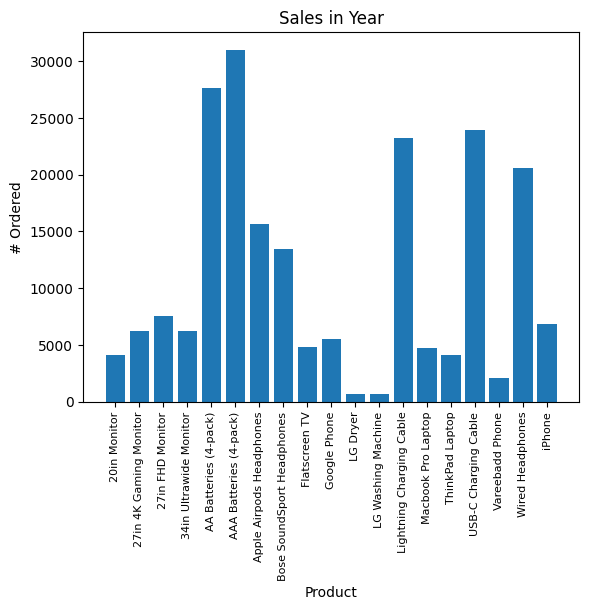

In [85]:
products = [product for product, df in df.groupby('Product')]

plt.bar(products, results['Quantity Ordered'])

plt.title('Sales in Year')
plt.xlabel('Product')
plt.xticks(results.index, rotation=90, size=8)
plt.ylabel('# Ordered')

plt.show()

/tmp/ipykernel_213416/3082628939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
/tmp/ipykernel_213416/3082628939.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation=90)


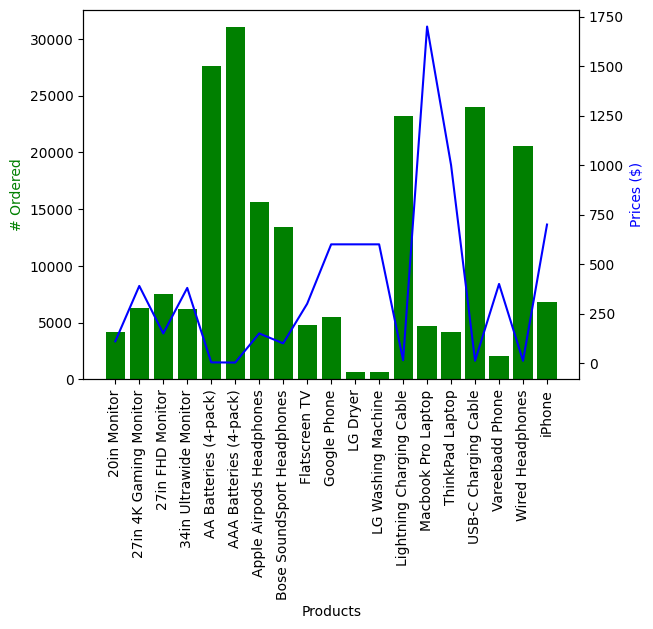

In [99]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, results['Quantity Ordered'], color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Products')
ax1.set_xticklabels(products, rotation=90)
ax1.set_ylabel('# Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')

plt.show()